# Analyzing Covid19 from public accessible data
In this notebook, I will use the public data to see what the situation is now.

## 1 - Import libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [131]:
pd.__version__

'1.0.3'

## 2 - Import global data by url

In [132]:
confirmed_global=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_global=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_global=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## 3 - Get the data for a specific country/region

In [133]:
def get_country_data(country_name):
    confirmed=np.array(np.sum(confirmed_global[confirmed_global['Country/Region'].str.contains(country_name)].iloc[:,4:]))
    date=np.array(confirmed_global[confirmed_global['Country/Region'].str.contains(country_name)].iloc[:,4:].columns,dtype=str)
    deaths=np.array(np.sum(deaths_global[deaths_global['Country/Region'].str.contains(country_name)].iloc[:,4:]))
    recovered=np.array(np.sum(recovered_global[recovered_global['Country/Region'].str.contains(country_name)].iloc[:,4:]))
    country_data=[date,confirmed,deaths,recovered]
    return country_data

### Test function

In [134]:
country_name="China"
date=np.array(confirmed_global[confirmed_global['Country/Region'].str.contains(country_name)].iloc[:,4:].columns,dtype=str)
date.shape

(74,)

## 4 - Calculate the derivatives

In [135]:
def get_derivatives(data):
    d=np.zeros(data.shape,dtype=int)
    d[0]=data[0]
    for i in range(len(data)-1):
        d[i+1]=data[i+1]-data[i]
    return d

## 4.1 - Smearing

In [136]:
def smearing(data,days):
    data=np.array(data)
    tmp=np.zeros(len(data),dtype=data.dtype)
    if len(data)>=2*days+1:
        for i in range(days):
            tmp[i]=np.average(data[:i+days+1])
        for i in range(days,len(data)-days):
            tmp[i]=np.average(data[i-days:i+days+1])
        for i in range(len(data)-days,len(data)):
            tmp[i]=np.average(data[i-days:])
        return tmp
    else:
        return data

In [137]:
# data=[0,1,2,3,4,5,6,7,8,9]
data=[1,2,3]
smearing(data,5)

array([1, 2, 3])

In [138]:
country_data=get_country_data("China")
smear_days=0
confirmed=country_data[1]
confirmed=smearing(confirmed,smear_days)
confirmed

array([  548,   643,   920,  1406,  2075,  2877,  5509,  6087,  8141,
        9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814,
       39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434,
       74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166,
       78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690,
       80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003,
       81033, 81058, 81102, 81156, 81250, 81305, 81435, 81498, 81591,
       81661, 81782, 81897, 81999, 82122, 82198, 82279, 82361, 82432,
       82511, 82543])

## 5 - Plot multiple countries

In [255]:
def plot_countries(countries_names,days=30,plot=["d"],figsize=(9,7.2),smear_days=0):
    
    plt.figure(figsize=figsize)
    
    SMALLER_SIZE = 12
    SMALL_SIZE = 15
    MEDIUM_SIZE = 25
    BIGGER_SIZE = 35
    title_size=25
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    markercycle = cycler(marker=['o', 'v',7, 'x', '<', '.', '>','D','^','s'])
    colorcycle = cycler(color=colors)
    plt.gca().set_prop_cycle(markercycle+colorcycle)
    for country_name in countries_names:
        country_data=get_country_data(country_name)
        date=country_data[0]
        for i in range(len(date)):
            date[i]=date[i][:-3]
        confirmed=country_data[1]
        deaths=country_data[2]
        recovered=country_data[3]
        open_cases=confirmed-deaths-recovered
        d_confirmed=get_derivatives(confirmed)
        d_confirmed=smearing(d_confirmed,smear_days)
        d_deaths=get_derivatives(deaths)
        d_deaths=smearing(d_deaths,smear_days)
        d_recovered=get_derivatives(recovered)
        d_recovered=smearing(d_recovered,smear_days)
        d_open_cases=get_derivatives(open_cases)
        d_open_cases=smearing(d_open_cases,smear_days)
        x=range(days)
        if "c" in plot:
            plt.plot(confirmed[-days:],label=country_name +" total confirmed")
            plt.title("Covid-19 Total Confirmed Cases by Countries",fontsize=title_size)
        if "d" in plot:
            plt.plot(deaths[-days:],label=country_name +" total deaths")
            plt.title("Covid-19 Total Deaths by Countries",fontsize=title_size)
        if "r" in plot:
            plt.plot(recovered[-days:],label=country_name +" total recovered")
            plt.title("Covid-19 Total Recovered Cases by Countries",fontsize=title_size)
        if "o" in plot:
            plt.plot(open_cases[-days:],label=country_name +" open cases")
            plt.title("Covid-19 Total Open Cases by Countries",fontsize=title_size)
        if "dc" in plot:
            plt.plot(d_confirmed[-days:],label=country_name +" confirmed increase")
            plt.title("Covid-19 Confirmed Cases Daily Increase by Countries",fontsize=title_size)
        if "dd" in plot:
            plt.plot(d_deaths[-days:],label=country_name +" deaths increase")
            plt.title("Covid-19 Deaths Daily Increase by Countries",fontsize=title_size)
        if "dr" in plot:
            plt.plot(d_recovered[-days:],label=country_name +" recovered increase")
            plt.title("Covid-19 Recovered Cases Daily Increase by Countries",fontsize=title_size)
        if "do" in plot:
            plt.plot(d_open_cases[-days:],label=country_name +" open cases increase")
            plt.title("Covid-19 Open Cases Daily Increase by Countries",fontsize=title_size)
        if len(plot)>1 and len(countries_names)!=1:
            plt.title("Covid-19 by Countries",fontsize=title_size)
        if len(countries_names)==1:
            plt.title("Covid-19 in "+countries_names[0],fontsize=title_size)
    
    my_xticks=date[-days:]
    frequency=1
    if days > 40:
        frequency=2
    plt.xticks(x[::frequency], my_xticks[::frequency])
#     plt.xticks(x, plot_dates)
    plt.xticks(rotation=45)
    plt.xlabel('date')
    plt.legend()
    plt.show()

### Test function

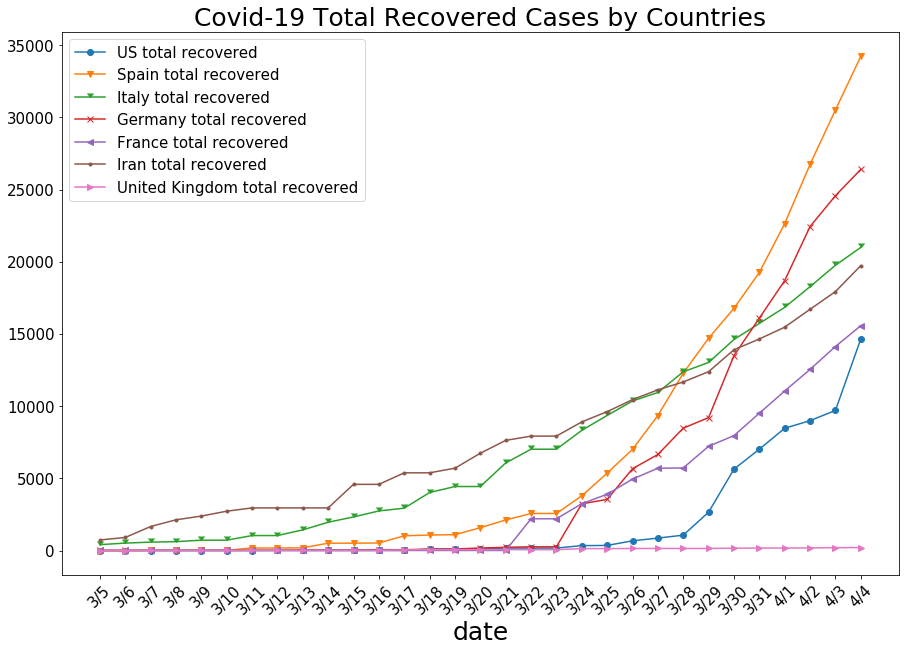

In [265]:
countries_names=["US","Spain","Italy","Germany","France","Iran","United Kingdom"]
# countries_names=["United Kingdom"]
plot=['r']
plot_countries(countries_names,31,plot,figsize=(15,10),smear_days=0)

# Data from US

## 1 - Get US data

In [120]:
confirmed_US=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_US=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

## 2 -  Get data for state/county

In [121]:
def get_US_data(name):
    date=np.array(confirmed_US[confirmed_US['Combined_Key'].str.contains(name,na=False)].iloc[:,11:].columns,dtype=str)
    confirmed=np.array(np.sum(confirmed_US[confirmed_US['Combined_Key'].str.contains(name,na=False)].iloc[:,11:]))
    deaths=np.array(np.sum(deaths_US[deaths_US['Combined_Key'].str.contains(name,na=False)].iloc[:,12:]))
    population=get_population(name)
    with np.errstate(divide='ignore',invalid='ignore'):
        confirmed_rate=confirmed/population
    data=[date,confirmed,deaths,confirmed_rate]
    return data

### Test

In [122]:
name="Florida"
data=get_US_data(name)
confirmed=data[1]
population=get_population(name)
confirmed_rate=confirmed/population
confirmed_rate

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.65598401e-08, 9.31196802e-08, 9.31196802e-08, 1.39679520e-07,
       1.39679520e-07, 3.25918881e-07, 4.65598401e-07, 6.05277921e-07,
       6.98397601e-07, 1.11743616e-06, 1.39679520e-06, 2.32799200e-06,
       3.53854785e-06, 4.65598401e-06, 4.70254385e-06, 8.84636962e-06,
      

## 3 - Plot data

In [160]:
def plot_data(names,days=30,plot=['c'],figsize=(9,7.2)):
    plt.figure(figsize=figsize)
        
    SMALL_SIZE = 15
    MEDIUM_SIZE = 25
    BIGGER_SIZE = 35
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    markercycle = cycler(marker=['o', 'v',7, 'x', '<', '.', '>','D','^','s'])
    colorcycle = cycler(color=colors)
    plt.gca().set_prop_cycle(markercycle+colorcycle)
    
    for name in names:
        data=get_US_data(name)
        confirmed=data[1]
        d_confirmed=get_derivatives(confirmed)
        deaths=data[2]
        confirmed_rate=data[3]
        d_deaths=get_derivatives(deaths)
        
        date=data[0]
        for i in range(len(date)):
            date[i]=date[i][:-3]        
        if "c" in plot:
            plt.plot(confirmed[-days:],label=name +" total confirmed")
        if "cr" in plot:
            plt.plot(confirmed_rate[-days:]*100,label=name +" confirmed rate")
            plt.ylabel("Percentage")
        if "d" in plot:
            plt.plot(deaths[-days:],label=name +" total deaths")
        if "dc" in plot:
            plt.plot(d_confirmed[-days:],label=name +" confirmed increase")
        if "dd" in plot:
            plt.plot(d_deaths[-days:],label=name +" deaths increase")
    x=range(days)

    
    plt.xticks(x, date[-days:])
    plt.xticks(rotation=45)
    plt.xlabel('date')
    plt.title("Covid-19 in US",fontsize=30)
    plt.legend()
    plt.show()

## 4 - Test

### Counties

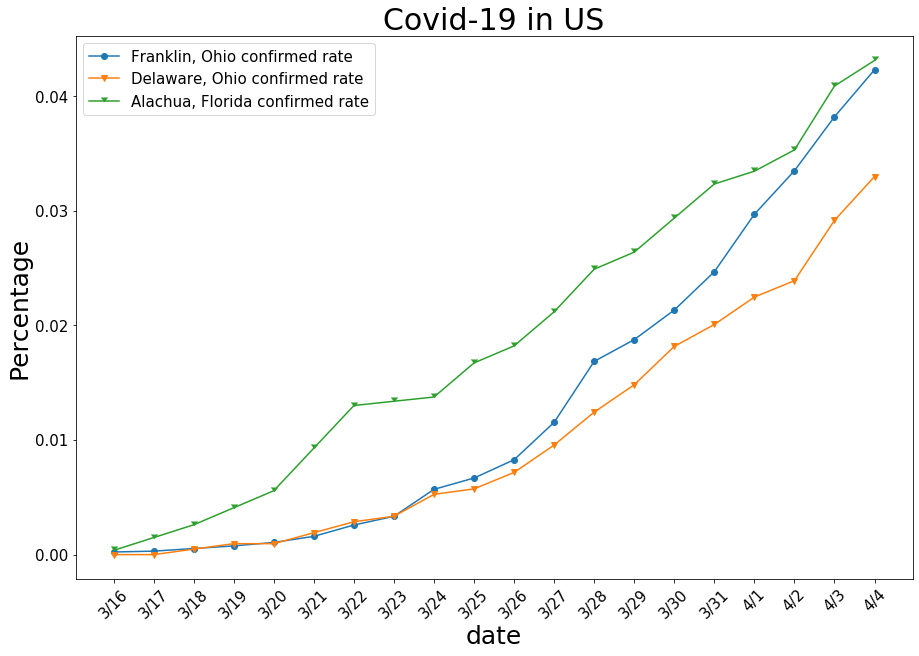

In [124]:
locations=["Franklin, Ohio","Delaware, Ohio","Alachua, Florida"]
plot_data(locations,20,plot=['cr'],figsize=(15,10))

### Get state names

In [125]:
US_state_names=sorted(set(list(confirmed_US['Province_State'])))

### Get confirmed rate for states

In [126]:
data={'State':[],'Population':[],'Confirmed':[],'Deaths':[],'Confirmed_Rate':[]}
df=pd.DataFrame(data)
# for i in range(len(US_state_names)):
i=0
state=US_state_names[i]
population=np.sum(deaths_US[deaths_US['Combined_Key'].str.contains(state+", US",na=False)]['Population'])
confirmed=np.sum(confirmed_US[confirmed_US['Combined_Key'].str.contains(state+", US",na=False)][confirmed_US.columns[-1]])
deaths=np.sum(deaths_US[deaths_US['Combined_Key'].str.contains(state+", US",na=False)][deaths_US.columns[-1]])
with np.errstate(divide='ignore',invalid='ignore'):
    confirmed_rate=confirmed/population
data_tmp={'State':[state],'Population':[population],'Confirmed':[confirmed],'Deaths':[deaths],'Confirmed_Rate':[confirmed_rate]}
df_tmp=pd.DataFrame(data_tmp)
df=df.append(df_tmp,ignore_index=True)
df=np.nan_to_num(df,nan=0,posinf=0)

In [127]:
def get_states_data():
    data={'State':[],'Population':[],'Confirmed':[],'Deaths':[],'Confirmed_Rate':[],'Death_Rate':[]}
    df=pd.DataFrame(data)
    for i in range(len(US_state_names)):
        state=US_state_names[i]
        if state=="District of Columbia":
            key=state+",US"
        else:
            key=state+", US"
        population=np.sum(deaths_US[deaths_US['Combined_Key'].str.contains(key,na=False)]['Population'])
        confirmed=np.sum(confirmed_US[confirmed_US['Combined_Key'].str.contains(key,na=False)][confirmed_US.columns[-1]])
        deaths=np.sum(deaths_US[deaths_US['Combined_Key'].str.contains(key,na=False)][deaths_US.columns[-1]])
        with np.errstate(divide='ignore',invalid='ignore'):
            confirmed_rate=confirmed/population
            confirmed_rate=np.nan_to_num(confirmed_rate,nan=0,posinf=0)
            death_rate=deaths/population
            death_rate=np.nan_to_num(death_rate,nan=0,posinf=0)
        data_tmp={'State':[state],'Population':[population],'Confirmed':[confirmed],'Deaths':[deaths],'Confirmed_Rate':[confirmed_rate],'Death_Rate':[death_rate]}
        df_tmp=pd.DataFrame(data_tmp)
        df=df.append(df_tmp,ignore_index=True)
    return df
df=get_states_data()
df

,State,Population,Confirmed,Deaths,Confirmed_Rate,Death_Rate
0,Alabama,4903185.0,1614.0,44.0,0.000329,0.000009
1,Alaska,179671.0,29.0,4.0,0.000161,0.000022
2,American Samoa,55641.0,0.0,0.0,0.000000,0.000000
3,Arizona,7278717.0,2187.0,52.0,0.000300,0.000007
4,Arkansas,3017804.0,743.0,14.0,0.000246,0.000005
5,California,39512223.0,12837.0,289.0,0.000325,0.000007
6,Colorado,5758736.0,4188.0,111.0,0.000727,0.000019
7,Connecticut,3565287.0,5276.0,165.0,0.001480,0.000046
8,Delaware,973764.0,593.0,14.0,0.000609,0.000014
9,Diamond Princess,0.0,49.0,0.0,0.000000,0.000000


### Sort states names by order

In [128]:
sort_key="Confirmed_Rate"
# sort_key="Death_Rate"
df.sort_values(by=sort_key,ascending=False,ignore_index=True).iloc[:30,:-1]

,State,Population,Confirmed,Deaths,Confirmed_Rate
0,New York,23628065.0,113833.0,3565.0,0.004818
1,New Jersey,8882190.0,34124.0,846.0,0.003842
2,Louisiana,4633902.0,12492.0,409.0,0.002696
3,Massachusetts,6892503.0,11720.0,216.0,0.001700
4,Connecticut,3565287.0,5276.0,165.0,0.001480
5,Michigan,9986857.0,14225.0,540.0,0.001424
6,District of Columbia,705749.0,902.0,21.0,0.001278
7,Washington,7614893.0,7247.0,315.0,0.000952
8,Illinois,12563152.0,10350.0,243.0,0.000824
9,Pennsylvania,12761364.0,10443.0,136.0,0.000818


In [129]:
sort_key="Population"
df.sort_values(by=sort_key,ascending=False,ignore_index=True).iloc[:,:]

,State,Population,Confirmed,Deaths,Confirmed_Rate,Death_Rate
0,California,39512223.0,12837.0,289.0,0.000325,0.000007
1,Texas,28995881.0,6556.0,116.0,0.000226,0.000004
2,New York,23628065.0,113833.0,3565.0,0.004818,0.000151
3,Florida,21439736.0,11534.0,194.0,0.000538,0.000009
4,Pennsylvania,12761364.0,10443.0,136.0,0.000818,0.000011
5,Illinois,12563152.0,10350.0,243.0,0.000824,0.000019
6,Ohio,11689100.0,3739.0,102.0,0.000320,0.000009
7,Georgia,10596111.0,6155.0,200.0,0.000581,0.000019
8,North Carolina,10450587.0,2484.0,34.0,0.000238,0.000003
9,Virginia,10286581.0,2675.0,54.0,0.000260,0.000005


### States

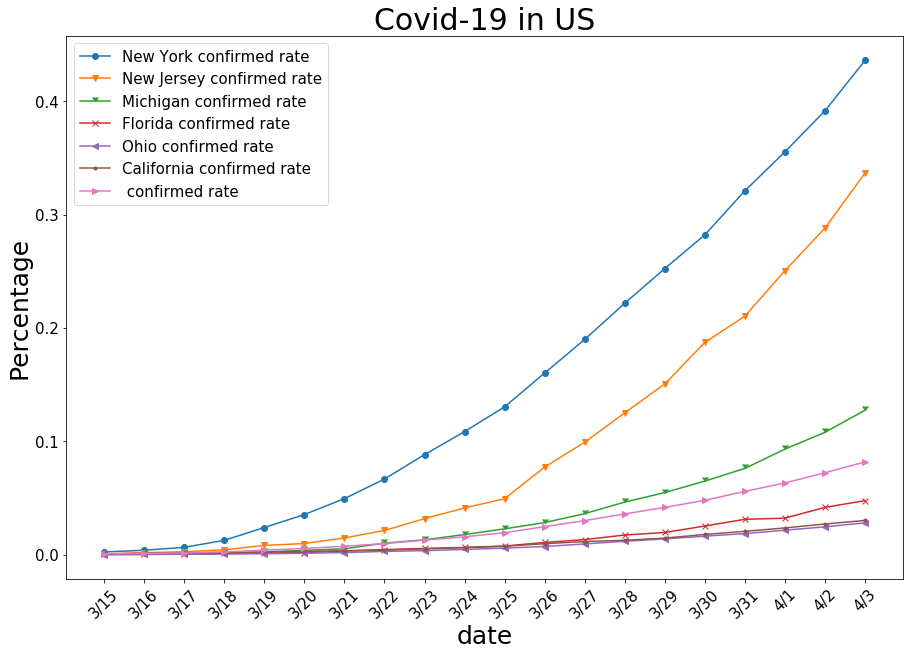

In [32]:
locations=["New York","New Jersey","Michigan","Florida","Ohio","California",""]
plot_data(locations,20,plot=['cr'],figsize=(15,10))

### Get population

In [33]:
name="Florida"
def get_population(name):
    a=deaths_US[deaths_US['Combined_Key'].str.contains(name,na=False)]['Population']
    population=np.sum(a)
    return population
get_population("California")

39512223

### Get Florida county population dictionary

In [34]:
state_name="Florida"
def get_population_dict(state_name):
    a=deaths_US[deaths_US['Province_State'].str.contains(state_name,na=False)]
    # b=a.sort_values(by=['Population'],ascending=False).iloc[:50,:]
    population_dict={}
    for i in range(len(a)):
        county_name=a.iloc[i]['Admin2']
        county_population=a.iloc[i]['Population']
        population_dict[county_name]=county_population
    return population_dict
population_dict=get_population_dict(state_name)

### Get population by key

In [35]:
name="Florida, US"
def get_population(name):
    a=deaths_US[deaths_US['Combined_Key'].str.contains(name,na=False)]
    return np.sum(a.iloc[:]['Population'])

get_population("Orange, Fl")

1393452

### Get confirmed rate dataframe

In [36]:
confirmed_rate_US=pd.DataFrame.copy(confirmed_US)
a=np.array(confirmed_rate_US.iloc[:,11:])
b=np.zeros(len(a))
for i in range(len(a)):
    b[i]=deaths_US.iloc[i]['Population']
b=b.reshape(len(a),1)
with np.errstate(divide='ignore',invalid='ignore'):
    c=np.divide(a,b)
c=np.nan_to_num(c,nan=0,posinf=0)
confirmed_rate_US.iloc[:,11:]=c

In [37]:
confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,37,45,51,55,56,58,69,77,82,84
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,2,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,51,64,79,100,127,174,239,286,316,316
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,17,17,19,22,0,0,30,30,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,51,69,67,0,125,274,274,303,344,501
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,61,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [38]:
confirmed_rate_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,0.000225,0.000274,0.000311,0.000335,0.000341,0.000353,0.000420,0.000469,0.000499,0.000511
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000036,0.000109,0.000109,0.000109
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,0.000017,0.000022,0.000027,0.000034,0.000043,0.000059,0.000081,0.000097,0.000108,0.000108
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0.000158,0.000158,0.000177,0.000205,0.000000,0.000000,0.000280,0.000280,0.000280,0.000345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
confirmed_rate_US.sort_values(by=confirmed_rate_US.columns[-1],ascending=False,ignore_index=True).iloc[:20,[5,6,-1]]

,Admin2,Province_State,4/3/20
0,Blaine,Idaho,0.015247
1,Rockland,New York,0.013165
2,Westchester,New York,0.012766
3,New York,New York,0.009850
4,Orleans,Louisiana,0.008910
5,Nassau,New York,0.008861
6,Suffolk,New York,0.006877
7,St. John the Baptist,Louisiana,0.006770
8,Dougherty,Georgia,0.006367
9,Orange,New York,0.006227


### Get State county names by order

In [41]:
def get_counties_names(state_name,num=None,ascending=False,order='cr'):
    if order == 'cr':
        a=confirmed_rate_US[confirmed_rate_US['Province_State'].str.contains(state_name,na=False)]
    if order == 'c':
        a=confirmed_US[confirmed_US['Province_State'].str.contains(state_name,na=False)]
    if order == 'd':
        a=deaths_US[deaths_US['Province_State'].str.contains(state_name,na=False)]
    b=a.sort_values(by=[a.columns[-1]],ascending=ascending).iloc[:num,:]
    counties=np.array(b['Admin2'],dtype='<U20')
    for i in range(len(counties)):
        if counties[i]=="New York":
            counties[i]+=" City, "+state_name
        else:
            counties[i]+=", "+state_name
    return counties

In [42]:
def plot_state_by_order(state_name,days=20,plot=['cr'],figsize=(15,10),num=10,ascending=False,order='cr'):
    counties=get_counties_names(state_name,num=num,order=order)
    a=list(counties)
    plot_data(a,days=days,figsize=figsize,plot=[order])

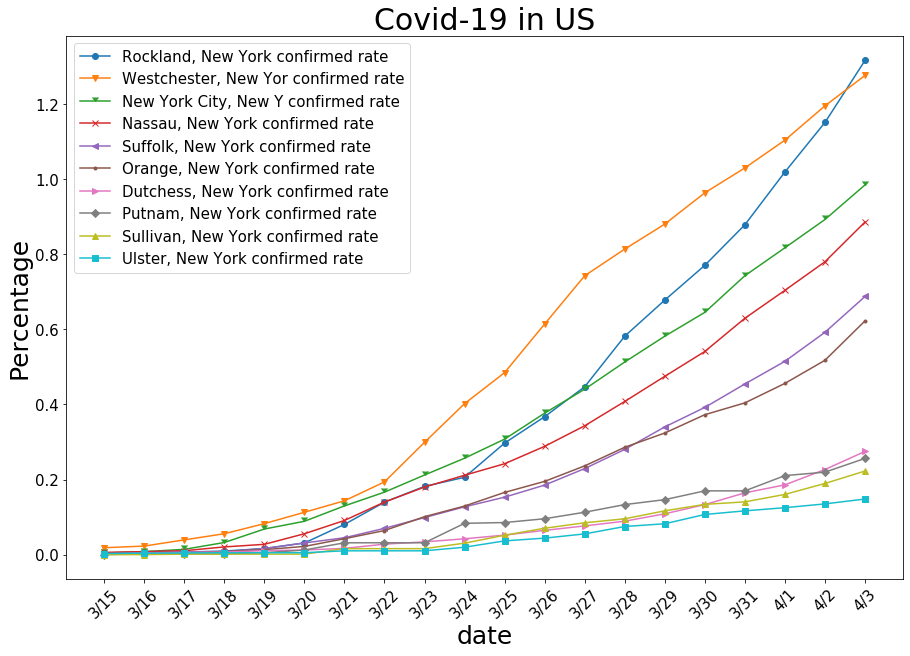

In [43]:
plot_state_by_order("New York",days=20,plot=['cr'],figsize=(15,10),num=10,ascending=False,order='cr')

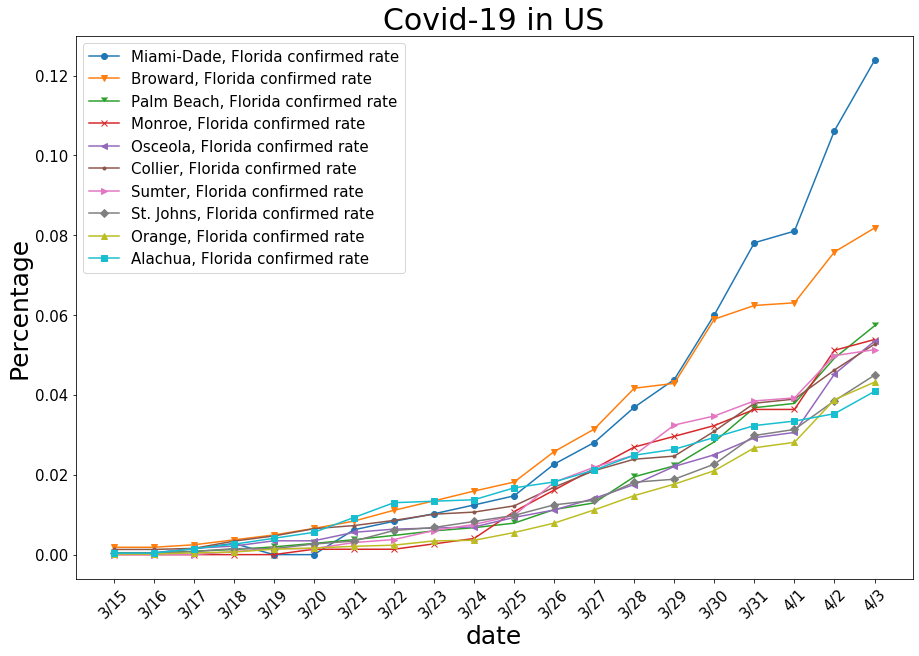

In [44]:
plot_state_by_order("Florida",days=20,plot=['cr'],figsize=(15,10),num=10,ascending=False,order='cr')

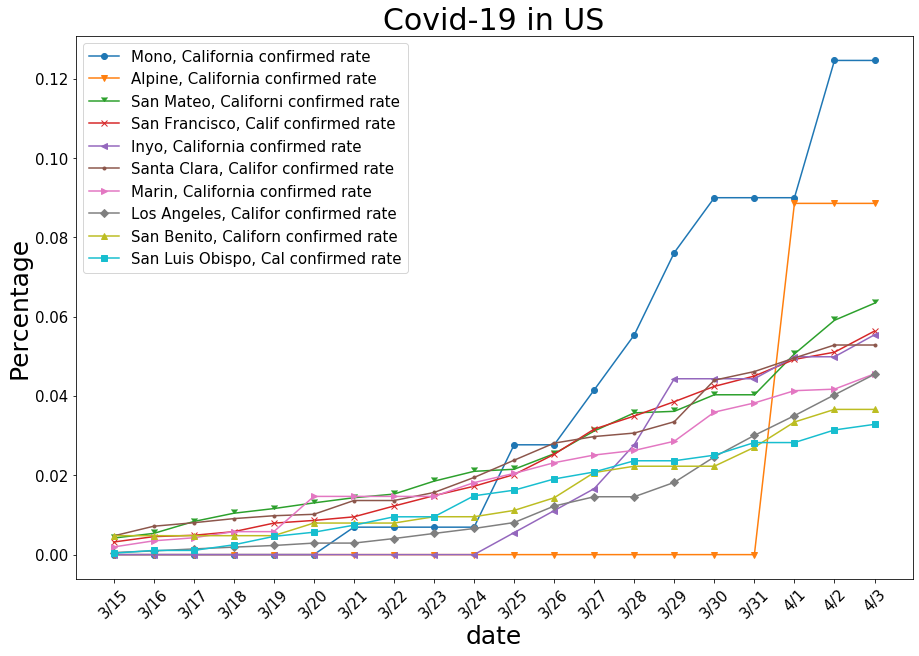

In [45]:
plot_state_by_order("California",days=20,plot=['cr'],figsize=(15,10),num=10,ascending=False,order='cr')

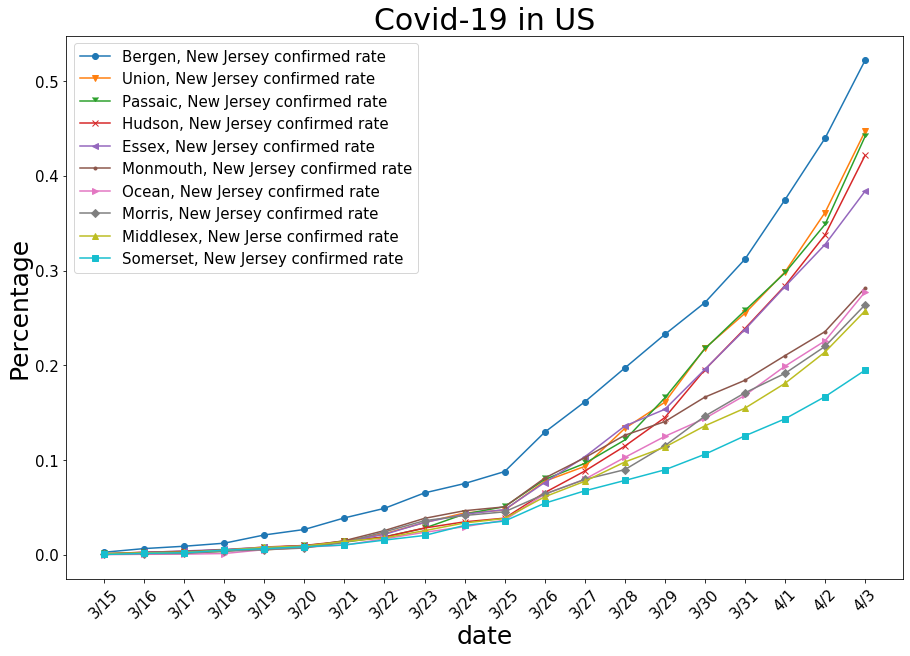

In [46]:
plot_state_by_order("New Jersey",days=20,plot=['cr'],figsize=(15,10),num=10,ascending=False,order='cr')

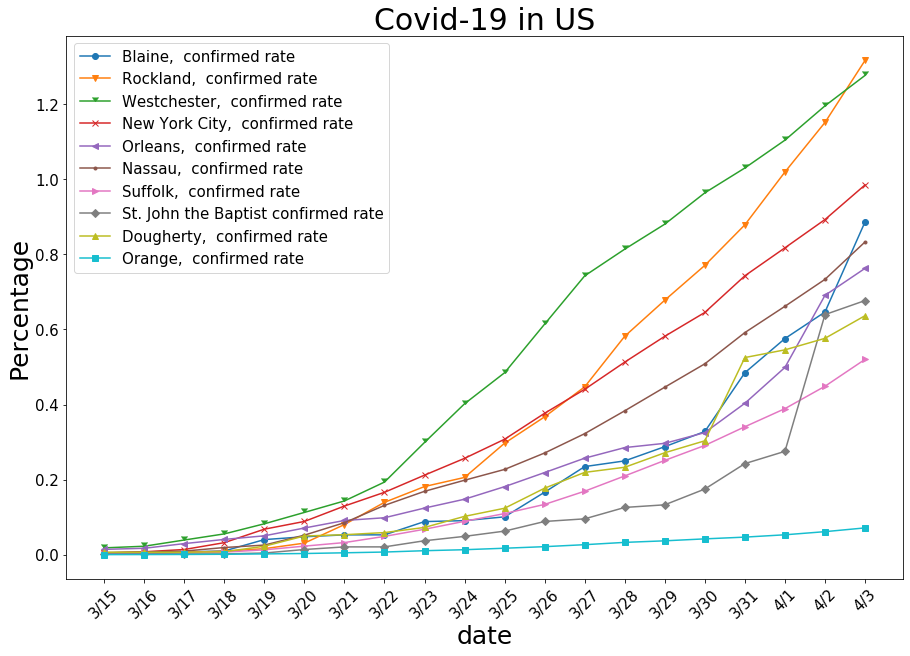

In [47]:
plot_state_by_order("",days=20,plot=['cr'],figsize=(15,10),num=10,ascending=False,order='cr')